**this is a template notebook. To get a 60 you will need to complete the first three chapters. From there is additional points. In the template you'll see text between <> so \<example> where you will have to isert your own text. 
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span> Week 4 Assignment: Regression <Title of your notebook>
## DMS - Regression Assignment (v1.1)
Author: <span>Stephen Pangga</span><br>
Student number: <span>629860</span><br>
Date: <span>12-05-2022</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* Matplotlib
* Statsmodels
* Skelearn

From these we will need the following libraries:

In [1]:
#enter here all those 'from .... import ....'

# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')
    
try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    

#pandas
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    

# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

try:
    import seaborn as sn
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sn
    print('seaborn was not installed, installed and imported')
    
    
from sklearn import metrics

NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
pandas already installed, only imported
sklearn already installed, only imported
seaborn already installed, only imported


# 1. The Data
We are going to use the datafile Basketball_season_1999-2000.csv</span>. This contains data from the 1999-2000 Basketball season player data</span>.

In [2]:
#enter the code to load the data
basketBallData = pd.read_csv('NBA-data.csv')

Here's a quick look at the data:

In [3]:
#enter the code to see the first few rows of the data
basketBallData.head()


,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163,956,1665,0,...,"Mar 6, 1972",07-Jan,216,325,147,United States,Robert G. Cole High School,1,1,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126,788,1696,95,...,"Jan 26, 1977",06-Jun,198,220,100,United States,Mainland High School,1,5,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947,752,1476,2,...,"Jul 24, 1963",06-Sep,206,265,120,United States,Summerfield High School,1,13,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853,729,1733,89,...,"Jun 7, 1975",6-0,183,165,75,United States,Bethel High School,1,1,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425,747,1666,177,...,"Jul 23, 1968",06-Apr,193,180,82,United States,Skyline High School,1,2,Seattle SuperSonics


*note:* You can score a +.5 point if you don't just pick randomly your variables, but use either a pairplot (a plot showing all scatterplots between all possible pairs of variables), a heatmap, and/or a correlation matrix, to pick some that at least have a reasonable correlation.

The variables FGM, FGA and PTS are going to be used for the prediction. The dependent variable FGM which stands for Field Goals Made and represent the goals made by the player while in the court which can be either 2 or 3 points.
The two variables that will be used to predict the FGM are
* PTS - Points, is the total number of points scored by field goals and free throws
* FGA - Field Goals Attempted, is the total number of field goals attempted.

I choose these variables, as there seems to be a relationship with the field goals made, to show how much points players are making and how much attempted shot they need in order to show their improvment when making a field goal.

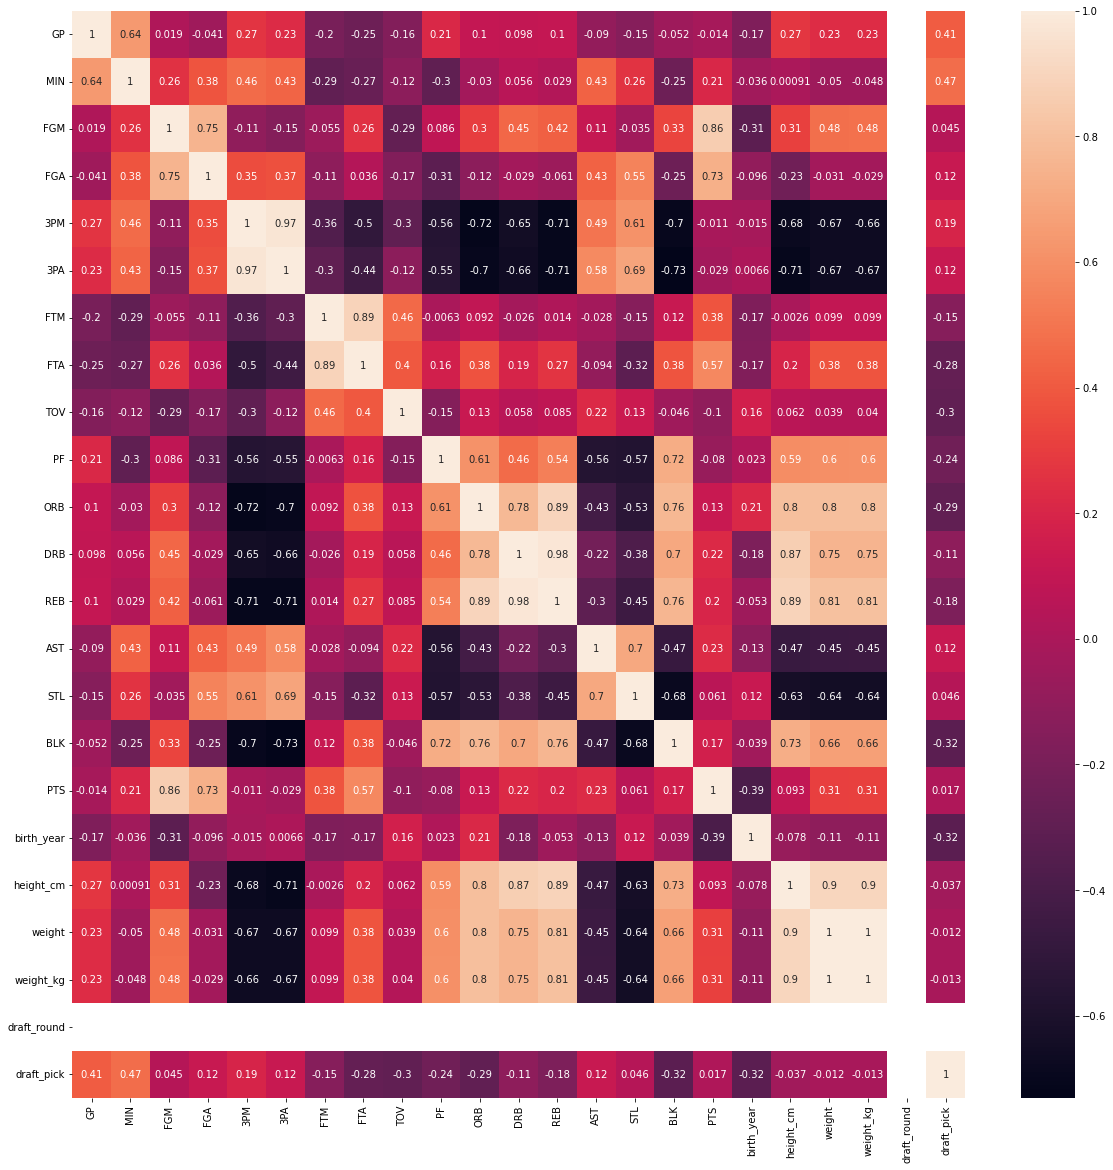

In [4]:
plt.figure(figsize=(20,20))
basketBallData.corr()
corrdata = basketBallData.corr()
sn.heatmap(corrdata, annot = True)
plt.show()

# 2. The Bivariate Regression

## 2.1. The First Bivariate Regression

First we are going to look at the predictions using only one of our two x's. 

We start with predicting FGM: Field goals made  using PTS: Points. Below a visualisation of these two:

The gradient (b1):  0.3984522493990608
The constant (b0):  -40.20649904875074


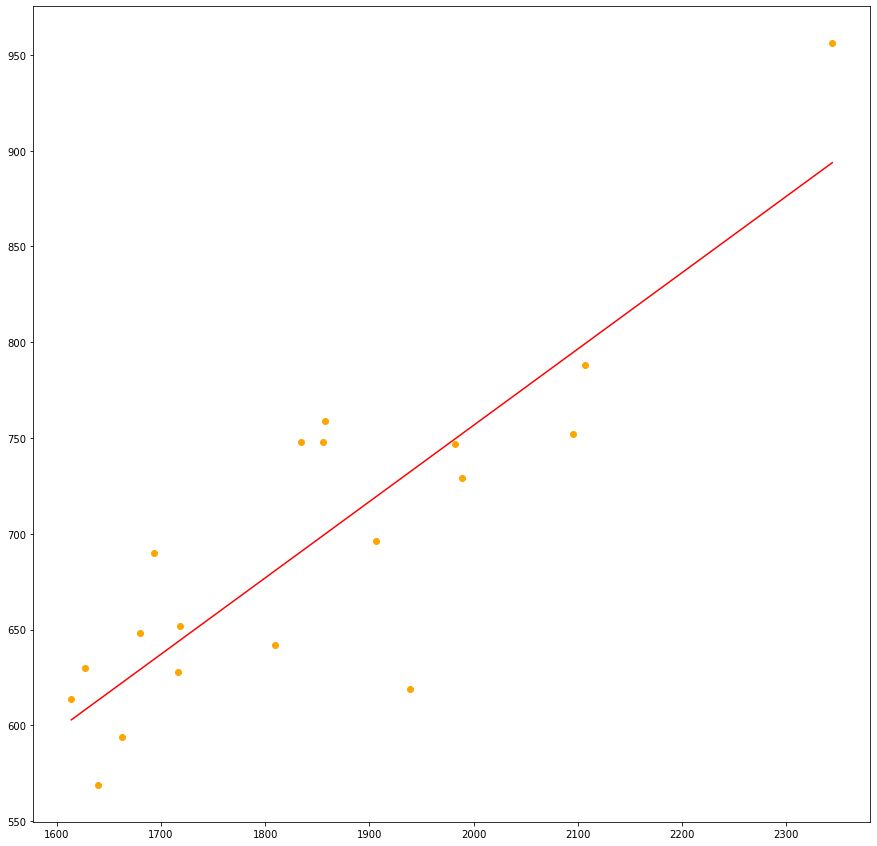

In [5]:
#enter code to show scatterplot
y_field_goals_made = basketBallData["FGM"].to_numpy()
x_points = basketBallData["PTS"].to_numpy()

sx2 = x_points.var()
mxy = np.array(x_points*y_field_goals_made).mean()
b1=(mxy-x_points.mean()*y_field_goals_made.mean())/sx2
print("The gradient (b1): ", b1)

b0=y_field_goals_made.mean()-b1*x_points.mean()
print("The constant (b0): ",b0)

#Prediction
myPrediction = b0 + b1*x_points

plt.figure(figsize=(15,15))
plt.scatter(x_points,y_field_goals_made, color='Orange')
plt.plot(x_points,myPrediction, color='red')
plt.show()


As can be seen from the scatterplot there seems be a clear relationship between the two variables. Every time there is a field goal a point is given to the player, a field goal is worth either 2 or 3 points. The players who can shoot three points per field goal tend to have a higher season points while having a lower field goals made.

Now that we have a visual inspection its time to perform a bivariate regression (twice, once for each x variable). 

We first split the data into training and testing data. We start again with the x of the Points:

In [6]:
#add code to create training and testing data
from sklearn.model_selection import train_test_split

xRes = x_points.reshape((-1,1))
yRes = y_field_goals_made.reshape((-1,1))

x_train, x_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.4, random_state=101)

Now setup the linear regression model and fit our training data:

In [7]:
#add code to create linear regression model

myModel=LinearRegression().fit(x_train, y_train)


Lets see how well the model performed with the training data, by visualisation:

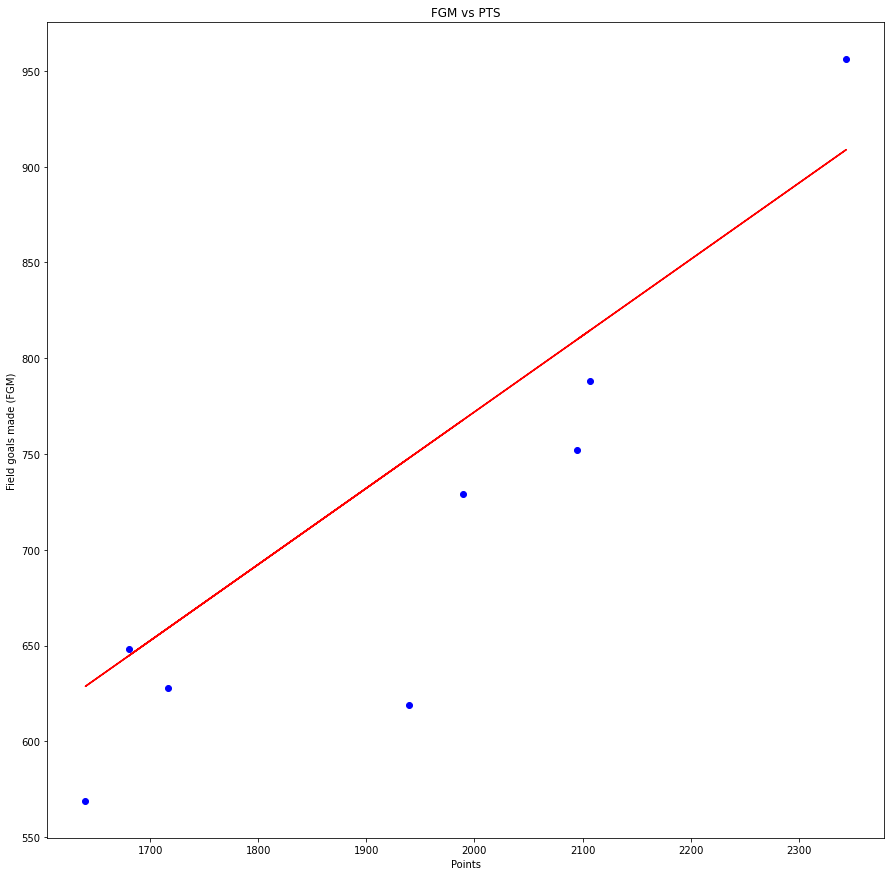

In [8]:
#add code to show scatterplot with the regression line
perfomance = myModel.predict(x_test)
plt.figure(figsize=(15,15))
plt.title("FGM vs PTS")
plt.xlabel("Points")
plt.ylabel("Field goals made (FGM)")
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test,perfomance, color='red')


There seem to be a strong relationship between field goals made and points. Looking at the X-axis 0 to 500 range has the most points of players made during their basket season. By looking at the graph, the close they are to the basket, the more accurate the players can score a point which means they have more field goals made.   

Besides from a visual, we can also use some metrics.

In [9]:
#code to show the results of the statsmodels.api summary
#to add a new constant
newX = sm.add_constant(x_points)
newModel = sm.OLS(y_field_goals_made, newX).fit()
newPred = newModel.predict(newX)
print(newModel.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     49.76
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.94e-06
Time:                        10:03:26   Log-Likelihood:                -99.066
No. Observations:                  19   AIC:                             202.1
Df Residuals:                      17   BIC:                             204.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.2065    104.815     -0.384      0.7

c:\Users\steph\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The R-squared is the coefficient of determination, this is used to measure the change factors. In the summary the R-Squared value is 0.98 which shows the relationship between the dependent variables based on the independent variables value.
In this case, the regression line equation will be: 
y = 0.3653x - 0.4580.


We can also check how well our model worked by using the testing data:

In [10]:
#code to show the accuracy score
myModel.score(x_test, y_test)

0.7313842696792476

The score of 0.98 represent the accuracy of the model that has been created from our prediction.

Now we repeat all these steps, but using the other x-variable: FGA (Field goal Attempted)

## 2.2. The Second Bivariate Regression

In this section we are going to repeat all the steps from the previous one, but now we are going to try to predict FGM (Field goals made) based on FGA (Field goals attempted).

Below a visualisation of these two:

The gradient (b1):  0.4154280839781711
The constant (b0):  86.73957110376193
Field goals made vs Field goals attempted scatter plot


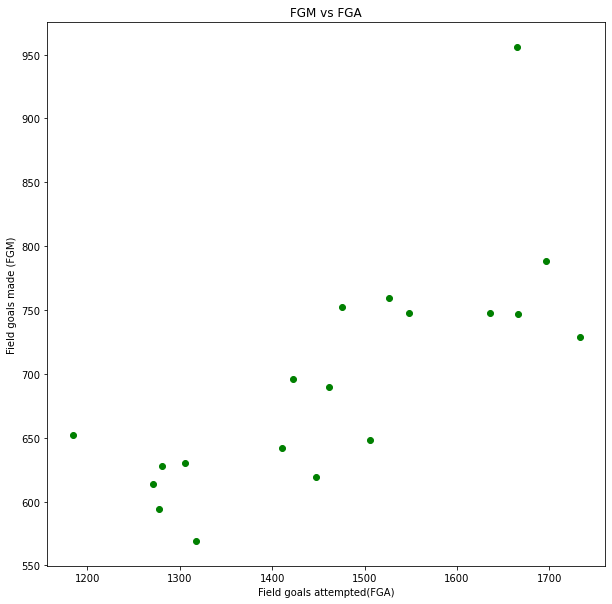

Field goals made vs Points scatter plot


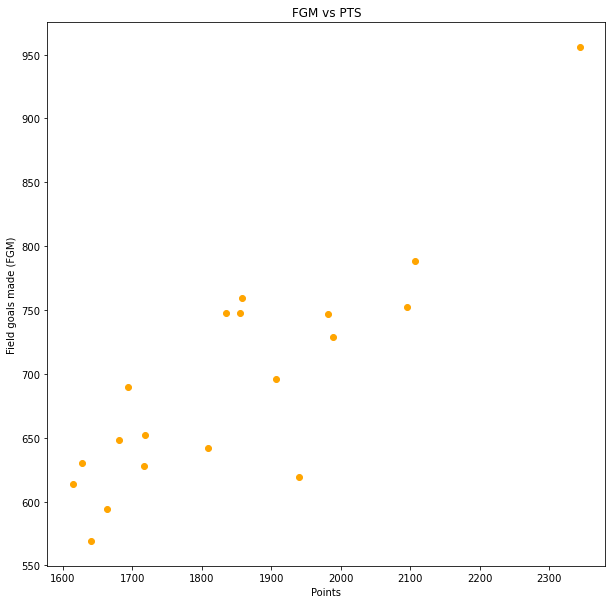

In [11]:
#enter code to show scatterplot

field_goal_madeY = basketBallData["FGM"].to_numpy()
field_goal_attemptedX = basketBallData["FGA"].to_numpy()

sx2 = field_goal_attemptedX.var()
mxy = np.array(field_goal_madeY*field_goal_attemptedX).mean()
b1=(mxy-field_goal_attemptedX.mean()*field_goal_madeY.mean())/sx2
print("The gradient (b1): ", b1)

b0=field_goal_madeY.mean()-b1*field_goal_attemptedX.mean()
print("The constant (b0): ",b0)

# #Prediction
myPrediction = b0 + b1*field_goal_attemptedX

print('Field goals made vs Field goals attempted scatter plot')
plt.figure(figsize=(10,10))
plt.title("FGM vs FGA")
plt.xlabel("Field goals attempted(FGA)")
plt.ylabel("Field goals made (FGM)")
plt.scatter(field_goal_attemptedX,field_goal_madeY, color='Green')
plt.show()


print('Field goals made vs Points scatter plot')
plt.figure(figsize=(10,10))
plt.title("FGM vs PTS")
plt.xlabel("Points")
plt.ylabel("Field goals made (FGM)")
plt.scatter(x_points, field_goal_madeY, color='Orange')


As can be seen from the scatterplot there seems be a clear relationship between FGA and FGM.
A field goals made is only counted when the ball actually goes in the basketball ring while field goals attempted represent the times a player has tried to score a point that didn't go in the ring because its either, they got blocked by the opposing player or they simply missed their shot. Looking at the graph, a player could have a large amount of field goals attempts but it doesn't usually succeed of making a field goal to obtain a point.


Creating again the training/testing sets and the model itself:

In [12]:
#add code here to split the data and the model itself:
from sklearn.model_selection import train_test_split
xRes = field_goal_attemptedX.reshape((-1,1))
yRes = field_goal_madeY.reshape((-1,1))
xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(xRes,yRes,test_size=0.4,random_state=101)


Now lets see how this performs:

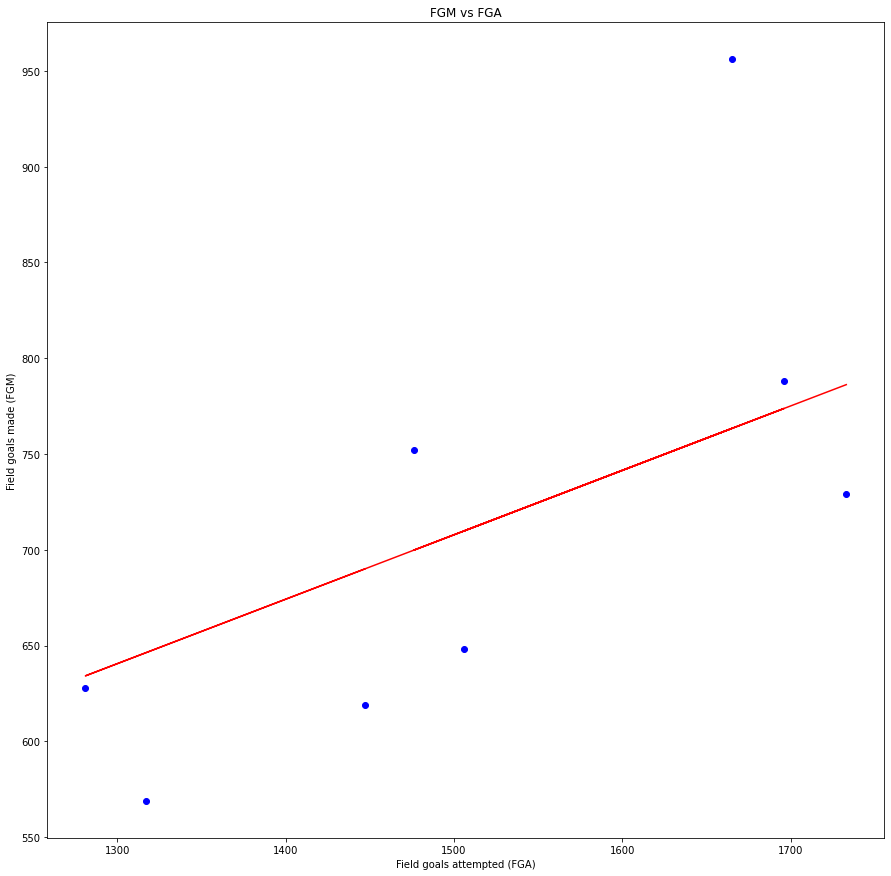

In [13]:
#add code to show both the scatterplot with the regression line, and the model summary results.
myModelv2=LinearRegression().fit(xRes_train, yRes_train)
p = myModelv2.predict(xRes_test)
plt.figure(figsize=(15,15))
plt.title("FGM vs FGA")
plt.xlabel("Field goals attempted (FGA)")
plt.ylabel("Field goals made (FGM)")
plt.scatter(xRes_test,yRes_test, color='blue')
plt.plot(xRes_test,p, color='red')


Comparing both scatter plot, you can see that overtime, that players have become better at scoring. The field goal made in the graph: FGM vs POINTS has a stronger ascension than the graph: FGM vs. FGA.

Looking at the two different x-variable, there seems to be a relationship between attempts and success as if there is more chances to score the more successful they player to make a point.

# 3. Multivariate Regression Analysis

In the previous chapter two separate bivariate regression analyses were performed to predict Field goals made (FGM) based on Points (PTS) and  Field goals attempted (FGA) separately. In this chapter we are going to look if we can make an even better prediction if we try to predict Field goals made (FGM) based on BOTH of these together.

We begin with combining the two x's into one X:

In [14]:
#add code here to add the two x's into one
FGMy = basketBallData["FGM"].to_numpy()
PTSx = basketBallData["PTS"].to_numpy()
FGAx = basketBallData["FGA"].to_numpy()

PTSxRes = PTSx.reshape((-1,1))
FGAxRes = FGAx.reshape((-1,1))
FGMyRes = FGMy.reshape((-1,1))


combine_X = np.hstack((PTSxRes, FGAxRes))

To actually perform the regression now, we can use the exact same method as before with the bivariate one:

In [15]:
#code to split the data, and create & fit the model:
from sklearn.model_selection import train_test_split
xRes_train, xRes_test, yRes_train, yRes_test = train_test_split(combine_X, FGMyRes, test_size=0.4, random_state=101)
myModel=LinearRegression().fit(xRes_train, yRes_train) 

A visualisation becomes now more difficult, since it would have to be in 3D. (0.5 bonus if you manage to do this). However, the model summary still works:

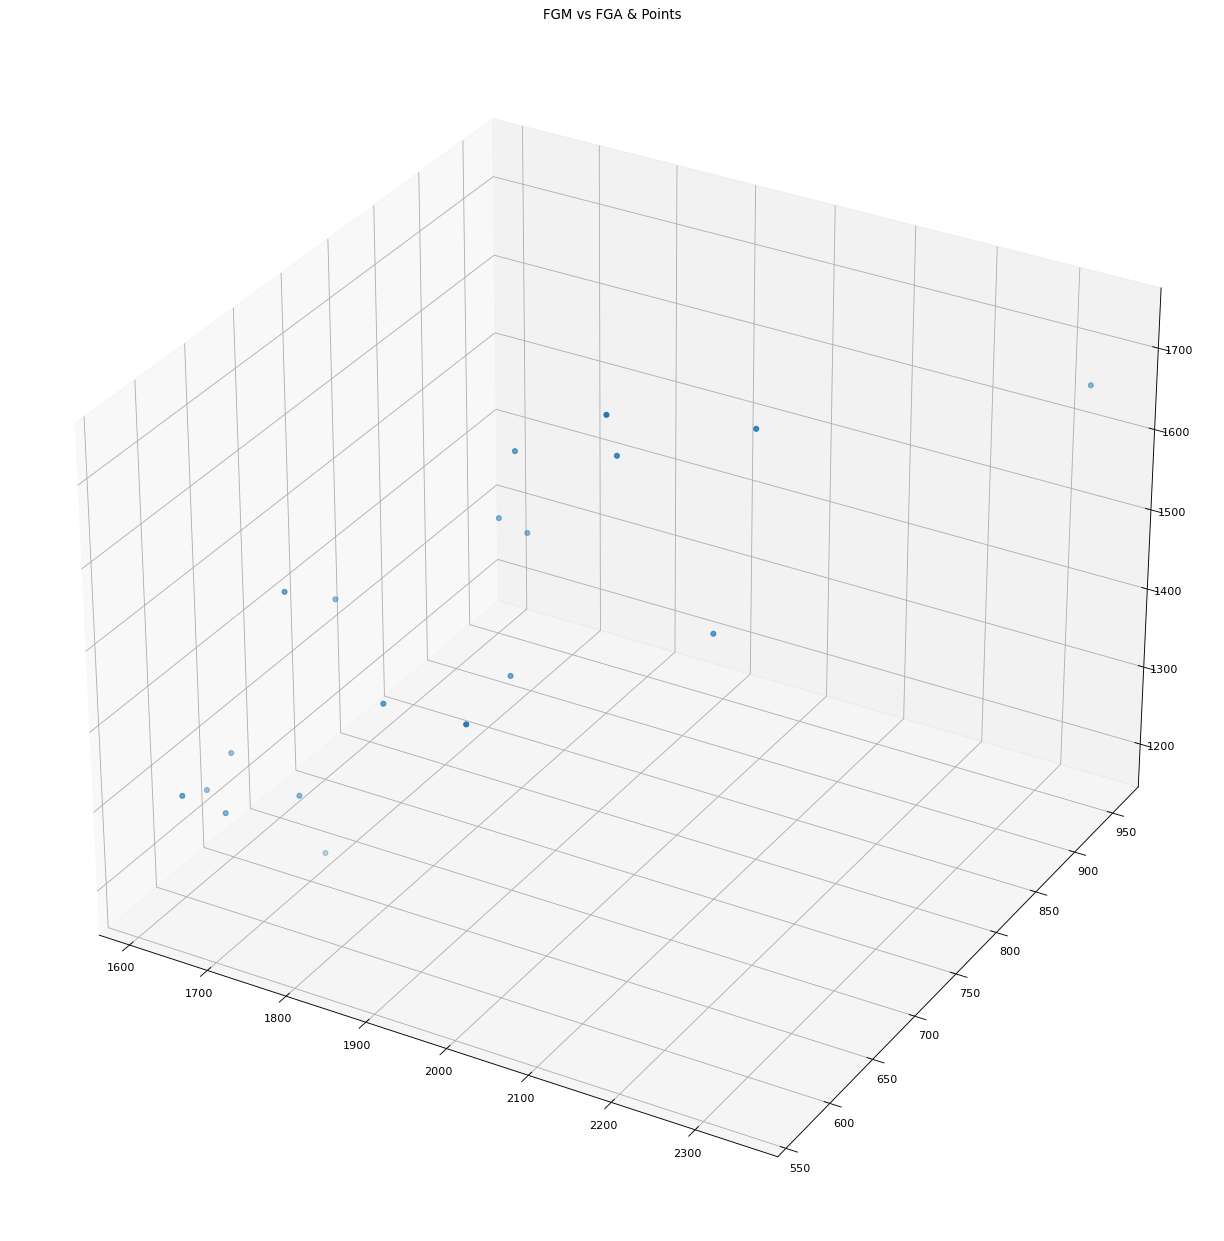

In [16]:
#3D scatterplot
fig = plt.figure(figsize=(20,20), dpi=80)
ax = plt.axes(projection='3d')
plt.title("FGM vs FGA & Points")
zdata = FGAx
xdata = PTSx
ydata = FGMy
ax.scatter3D(xdata, ydata, zdata)

In [17]:
#code to show model summary and accuracy score
newX = sm.add_constant(combine_X)
newModel = sm.OLS(FGMyRes, newX).fit()
new_prediction = newModel.predict(newX)
newModel.summary()

c:\Users\steph\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     27.77
Date:                Sun, 22 May 2022   Prob (F-statistic):           6.26e-06
Time:                        10:03:27   Log-Likelihood:                -97.832
No. Observations:                  19   AIC:                             201.7
Df Residuals:                      16   BIC:                             204.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5370    106.119     -0.825      0.422    -312.498     137.424
x1             0.3106      0.080      3.866      0.001       0.140       0.481
x2             0.1430      0.096      1.489      0.156      -0.061       0.347
==============================================================================
Omnibus:                        1.062   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                0.406
Skew:                          -0.357   Prob(JB):                        0.816
Kurtosis:                       3.046   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We focus on the adjusted R-square because it can show more of a precise correlation between the variables by considering the amount of independent variables that are added to the model that can affect the result of R-squared therefore, using adj r-squared is more reliable when it comes to predicting result with new data.

We also see more rows now in the 'coef' column. This is due to adding an aditional x variable in the to our prediction. At the start, we use Field goals made and points, but in this chapter, we added a new x variable which is the field goals attempted.

The model is different as it is using three variables, which has 2 predictors and an outcome. In beveriate regression we have 2, a predictor and an outcome. In this model, which can be used to determine which variable influence outcome. In this case, the outcome is a higher field goals made and the predictors are the points and field goals attempted, these shows that the higher these 2 predictors are the higher it influences the outcome.

A last thing to do would be to check the VIF's:

In [18]:
#add code here to see the VIF's
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]


[103.69702223439292, 2.1679080108193776, 2.167908010819377]

The result are different variation inflation values. The 1st variable is the VIF constant which we ignore, but the either two values are almost similar. If the VIF value is higher than 10, we tend to leave it out as it shows a high correlation whih can show problems. Since our VIF values of 2.16... which is below 10.

<font size="5"><center>-----Chapters 1 to 3 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 4. Selecting Input Variables

In chapter 3 we improved on the model to predict <span style='background:yellow'>\<your y-variable name></span> by using two input variables. We can actually add as many input variables as we like. Lets explore this by simply first adding ALL other variables as X.

In [19]:
#add code to create an X variable using all variables, except of course your y variable:


We could first have a quick look at the results of this model:

In [20]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


However we have to be careful with those VIF's. So lets see:

In [21]:
#add code here to show the VIF's.

We need to remove the ones with a VIF higher than 10, but each time we remove one, the VIF's change. Lets create a small Python function that removes the highest VIF each time, until none of them are anymore above 10.

In [22]:
#add your function code here.


Lets run the function, and then use the result to create a new model:

In [23]:
#add code here that runs the just made function, and uses the result for the new model:


We might also keep an eye out on that adjusted R-square. Iterate over all possible combinations of input variables we have remaining, and see which combination yields the highest adjusted R-square.

In [24]:
#add your code here.


Finally lets see how this new model performs:

In [25]:
#add code here to model and fit the new X with the y, and show the model summary and accuracy score:


<span style='background:yellow'>\<interpret the result, how well is the model now compared to our previous models?></span>

# 5. Another splitting method

To obtain the the test and training data we used the so-called hold-out method. However other methods also exist for this. In this chapter an explanation **and practical example** is given for the \<your splitting method>.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work in principal, how is it different from the hold-out method?. You will need more cells than the ones below!></span>

In [26]:
#code using your method


<span style='background:yellow'>\<explain the result></span>

# 6. A New Technique

So far, we only used the 'basic' simple linear regression (the bivariate) and multiple linear regression. However, there are many variations, as also seen on the slides. In this chapter the \<your regression method> is explained.

<span style='background:yellow'>\<explain THOROUGHLY the method. How does it work, what makes it different from the regular linear regression, in which situations might this be optimal. You will need more cells than the ones below></span>

In [27]:
#code using your method


# 7. Surprise

There is a lot written about regression analysis, and although a lot was discussed during the lecture, that was just a tip of an iceberg. One thing for example that was not mentioned is \<start explaining from here....>

----this chapter is for the 10. It should be something substantial, related to regression and not already discussed----

---examples could be an explanation on the Gradient Descent approach to linear programming, or using Matrix Algebra to obtain the linear regression equation----